<a href="https://colab.research.google.com/github/priyaregit/Regresssion-ML_Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/priyaregit/Regresssion-ML_Retail-Sales-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

# Importing datetime module
from datetime import datetime as dt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Importing Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from xgboost import XGBRegressor

# Importing metrics for evaluation of models
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading both the data sets from Google drive and storing it as dataframes: ds1 and ds2
ds1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/Rossmann Stores Data.csv')
ds2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/store.csv')

# Setting the option to display upto 50 columns of the dataframe
pd.set_option ("display.max_columns", 50)

### Dataset First View

In [ ]:
# Dataset First Look

# Checking the head (i.e. first 5 rows) of ds1
ds1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Checking the head of ds2
ds2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Checking the shape of ds1 and ds2
ds1.shape , ds2.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [ ]:
# Dataset Info

# Checking information about dataset 'ds1'
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Checking information about dataset 'ds2'
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f"The duplicate data present in ds1 is: {ds1.duplicated().sum()}")
print(f"The duplicate data present in ds2 is: {ds2.duplicated().sum()}")

The duplicate data present in ds1 is: 0
The duplicate data present in ds2 is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(f"The number of missing/null values in dataset 'ds1' are: ")
print(ds1.isnull().sum())
print('\n')
print(f"The number of missing/null values in dataset 'ds2' are: ")
print(ds2.isnull().sum())

The number of missing/null values in dataset 'ds1' are: 
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


The number of missing/null values in dataset 'ds2' are: 
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<Axes: >

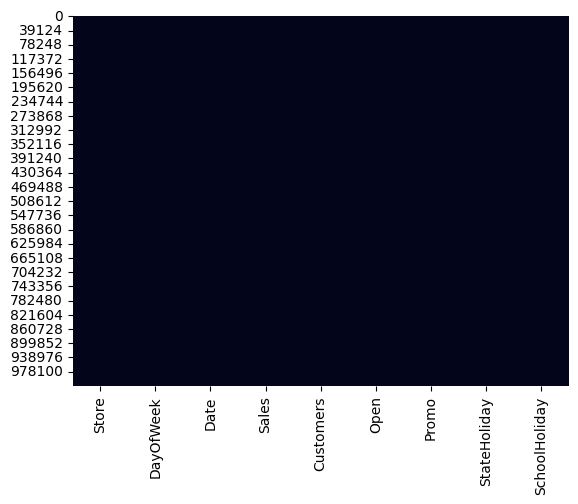

In [ ]:
# Visualizing the missing values

# Checking for missing/null values by plotting Heatmap of ds1
sns.heatmap(ds1.isnull(), cbar=False)

<Axes: >

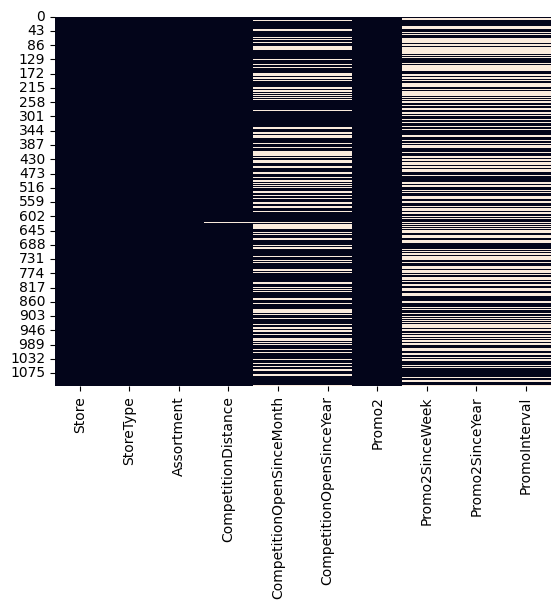

In [ ]:
# Checking for missing/null values by plotting Heatmap of ds2
sns.heatmap(ds2.isnull(), cbar=False)

### What did you know about your dataset?

 There are 1,017,209 rows and 9 columns in dataset 'ds1'

 There are 1,115 rows and 10 columns in dataset 'ds2'

 The two datasets have one common feature which is 'Store'

Neither of the datasets contain any duplicate data.

The dataset 'ds1' has no missing/null values.

The dataset 'ds2' contains missing/null values in the columns: 'CompetitionDistance ', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'.
              
  

 The features: 'Date', 'StateHoliday', 'StoreType', 'Assortment' and 'PromoInterval', are of object data type.

The rest of the features are either of integer or float data type, thereby indicating that they are numeric data.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f"The columns in ds1 are: \n",list(ds1.columns))
print('\n')
print(f"The columns in ds2 are: \n",list(ds2.columns))


The columns in ds1 are: 
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


The columns in ds2 are: 
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Dataset Describe

# Checking for statistics of the numeric columns in ds1
ds1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


We can see that the maximum sales turnover is 41,551 while the mean sales value is 5,773.

The maximum number of customers visiting a store is 7,388 while the mean value of customer footfalls is 633.

In [ ]:
# Checking for statistics of the numeric columns in ds2
ds2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


There are a total of 1,115 Rossmann stores.

The mean distance of a competitor is 5,405 metres while the farthest competitor is at a distance of 75,860 metres, the median competition distance being 2,325 metres.

The oldest competitor is open since 1900.

Promo2 has been running since 2009.

### Variables Description

The contents of the datasets are:

ds1  - Historical sales data of Rosmmann stores

ds2  - Supplemental information about the stores

The variables/features present in the datasets are:

*  Store - a unique Id for each store
* DayOfWeek - indicates the day of the week: 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thursday, 5 = Friday, 6 = Saturday, 7 = Sunday
*  Date - gives the date for which the data is provided
* Sales - the turnover for any given day
* Customers - the number of customers on a given day
*  Open - an indicator for whether the store was open: 0 = closed, 1 = open
*  StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the store was affected by the closure of public schools on a given day
*  StoreType - differentiates between 4 different store models: a, b, c, d
*  Assortment - describes an assortment level: a = basic, b = extra, c = extended
*  CompetitionDistance - distance in meters to the nearest competitor store
*  CompetitionOpenSinceMonth - gives the month when the nearest competitor was opened
*  CompetitionOpenSinceYear - gives the year when the nearest competitor was opened
*  Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*  Promo2SinceWeek - gives the calendar week when the store started participating in Promo2
*  Promo2SinceYear - gives the year when the store started participating in Promo2
*  PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. Ex: "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in ds1.columns.tolist():
  print("No. of unique values in ",i,"is",ds1[i].nunique())

print('\n')

for i in ds2.columns.tolist():
  print("No. of unique values in ",i,"is",ds2[i].nunique())


No. of unique values in  Store is 1115
No. of unique values in  DayOfWeek is 7
No. of unique values in  Date is 942
No. of unique values in  Sales is 21734
No. of unique values in  Customers is 4086
No. of unique values in  Open is 2
No. of unique values in  Promo is 2
No. of unique values in  StateHoliday is 5
No. of unique values in  SchoolHoliday is 2


No. of unique values in  Store is 1115
No. of unique values in  StoreType is 4
No. of unique values in  Assortment is 3
No. of unique values in  CompetitionDistance is 654
No. of unique values in  CompetitionOpenSinceMonth is 12
No. of unique values in  CompetitionOpenSinceYear is 23
No. of unique values in  Promo2 is 2
No. of unique values in  Promo2SinceWeek is 24
No. of unique values in  Promo2SinceYear is 7
No. of unique values in  PromoInterval is 3


## 3. ***Data Wrangling***

We can be more efficient working on a single (combined) dataset rather than two. Hence, I merge both the data sets on the basis of the common feature of 'Store'

### Data Wrangling Code

In [4]:
# Merging dataset ds2 with the dataset ds1, based on the column 'Store' and through an outer join

df = ds1.merge(ds2, on ='Store', how = 'outer')

# Checking for the shape of the new dataframe 'df' formed after merger
df.shape

(1017209, 18)

In [ ]:
# Checking the first 5 rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27


In [5]:
# Converting data type of the column 'Date' from object to datetime

df['Date'] =  pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [6]:
# Creating four new columns to show the date in the form of year, month, day and week number

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['week_number'] = df['Date'].dt.week

### What all manipulations have you done and insights you found?

* I merged the two datasets and created a new dataframe named 'df' with the combined data. The merged dataset contains 1,017,209 observations with 18 features.

* I have also converted the 'Date' column from 'object' data type to date-time format.

* I used 'Date' column to deduce the date, month, week number and year pertaining to each observation.

* We have sales data of 1115 Rossmann stores from 2013-01-01 to 2015-07-31 i.e. January-2013 to July-2015.

The rest of the data manipulation would be done as part of data pre-processing and feature engineering process.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

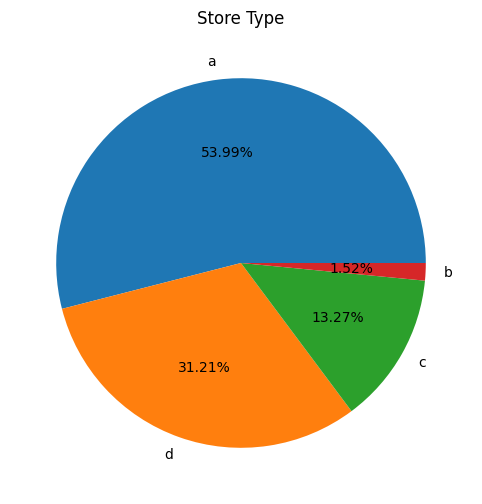

In [ ]:
# Chart - 1 visualization code

# Plotting a Pie Chart to visualize the number of stores by type
plt.pie(ds2['StoreType'].value_counts(), labels = ds2['StoreType'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Store Type", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
# Finding the value count of each Store type
ds2['StoreType'].value_counts().reset_index().rename(columns={'index':'Store Type','StoreType': 'Count'})

,Store Type,Count
0,a,602
1,d,348
2,c,148
3,b,17


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Majority of the stores are of type 'a' (54.23%), followed by type 'd' (30.76%) and type 'c' (13.45%) respectively. Only 17 of the total 1115 Rossmann stores (1.76%) are of type 'b'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

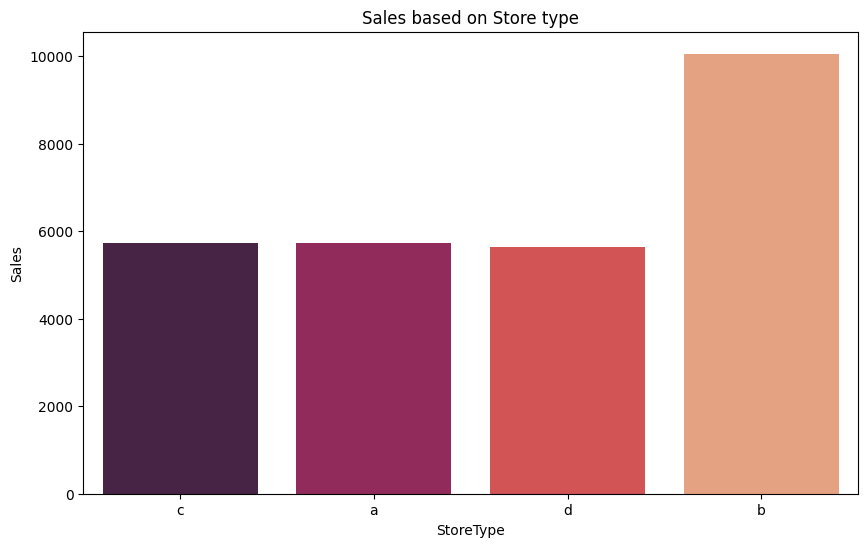

In [ ]:
# Chart - 2 visualization code

# Barplot to check Sales according to Store type
sns.barplot(x ='StoreType', y ='Sales', data = df, palette= 'rocket', ci = None)
plt.title('Sales based on Store type')
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The sales in store type 'b' surpasses that of the other store types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

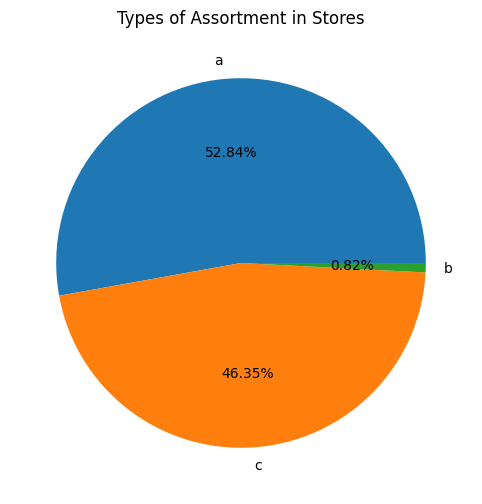

In [ ]:
# Chart - 3 visualization code

# Plotting a Pie Chart to visualize the number of stores by assortment
plt.pie(df['Assortment'].value_counts(), labels = df['Assortment'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Types of Assortment in Stores", fontsize = 12)

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

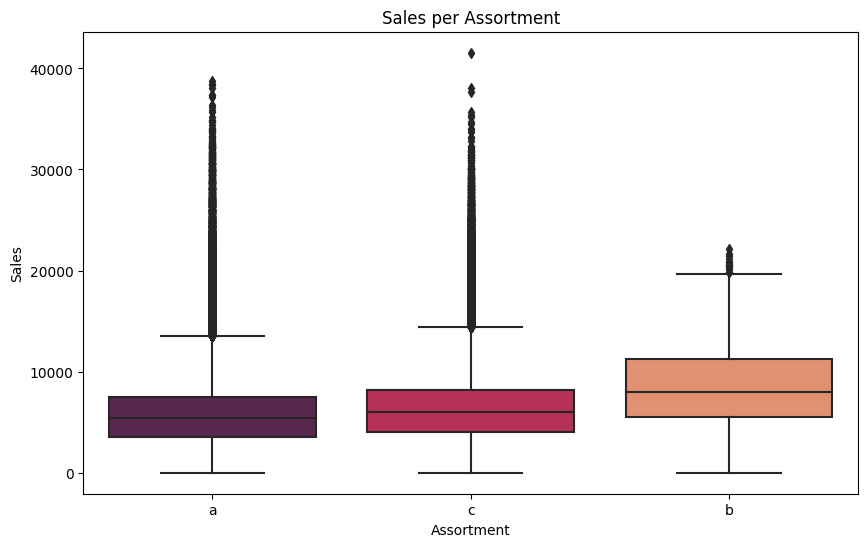

In [ ]:
# Chart - 4 visualization code

# Boxplot to check Sales according to Assortments
sns.boxplot(x ='Assortment', y ='Sales', data = df, palette= 'rocket')
plt.title('Sales per Assortment')
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The average sales of stores with assortment type 'b' (i.e. extra assortment) is highest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

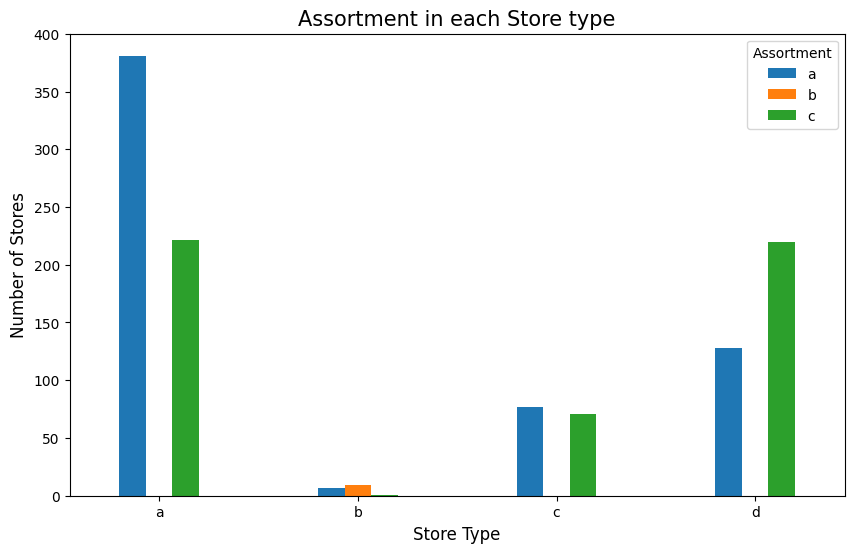

In [ ]:
# Chart - 5 visualization code

# Grouping the dataset by StoreType and finding the value count of Assortment
Assortment_by_StoreType = ds2.groupby(['StoreType'])['Assortment'].value_counts().unstack()

# Bar plot to visualize the Assortment by StoreType
Assortment_by_StoreType.plot( kind ='bar', width = 0.4)

# Giving labels and legend to the plot
plt.title('Assortment in each Store type', fontsize = 15)
plt.ylabel('Number of Stores', fontsize = 12)
plt.xlabel('Store Type', fontsize = 12)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
Assortment_by_StoreType

Assortment,a,b,c
StoreType,,,
a,381.0,NaN,221.0
b,7.0,9.0,1.0
c,77.0,NaN,71.0
d,128.0,NaN,220.0


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

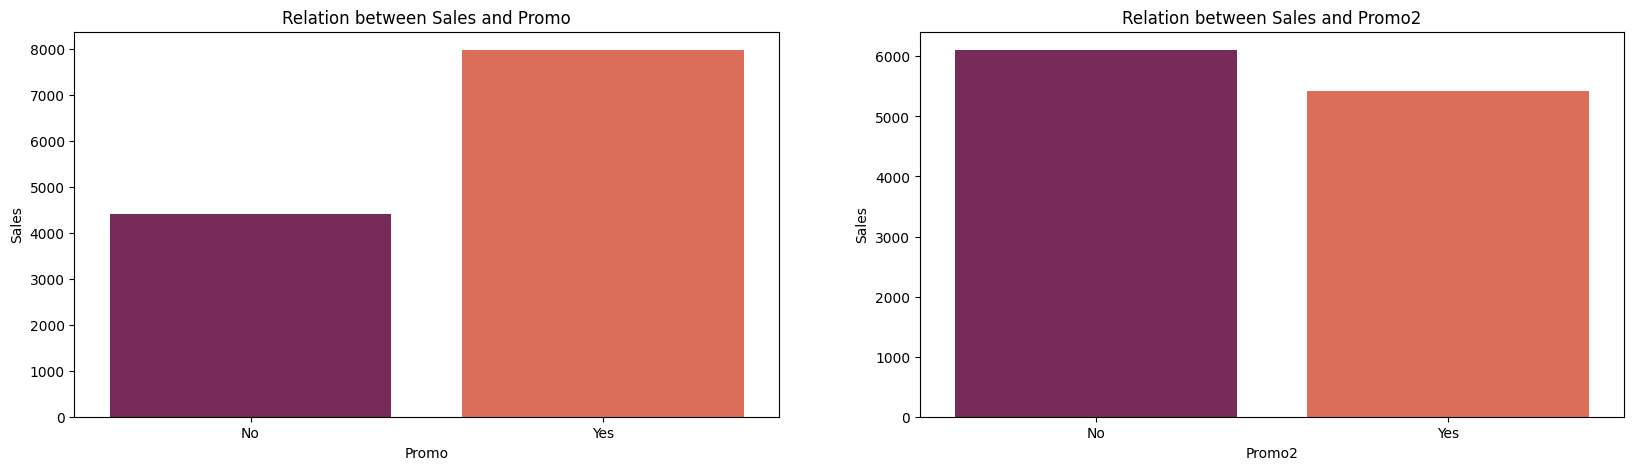

In [ ]:
# Chart - 6 visualization code

# Setting display figure size
fig = plt.figure(figsize = (20,5))

# Barplot to check for the effect of Promo on Sales
ax1 = plt.subplot2grid((1,2),(0,0))
sns.barplot(data = df, x = 'Promo', y = 'Sales', palette= 'rocket',ci = None)
plt.title("Relation between Sales and Promo")
plt.xticks([0,1], labels = ['No', 'Yes'])

ax1 = plt.subplot2grid((1,2),(0,1))
sns.barplot(data = df, x = 'Promo2', y = 'Sales', palette= 'rocket', ci = None)
plt.title("Relation between Sales and Promo2")
plt.xticks([0,1], labels = ['No', 'Yes'])

plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The presence of promotional offer greatly affects sales. The average sales nearly doubles when there is a promo in the store.

Promo2 marginally improves the sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

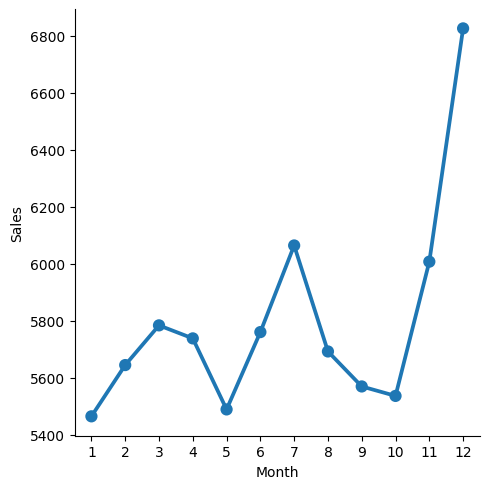

In [ ]:
# Chart - 7 visualization code

sns.catplot(x = "Month", y = "Sales" , data = df, kind = "point", ci = None)
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

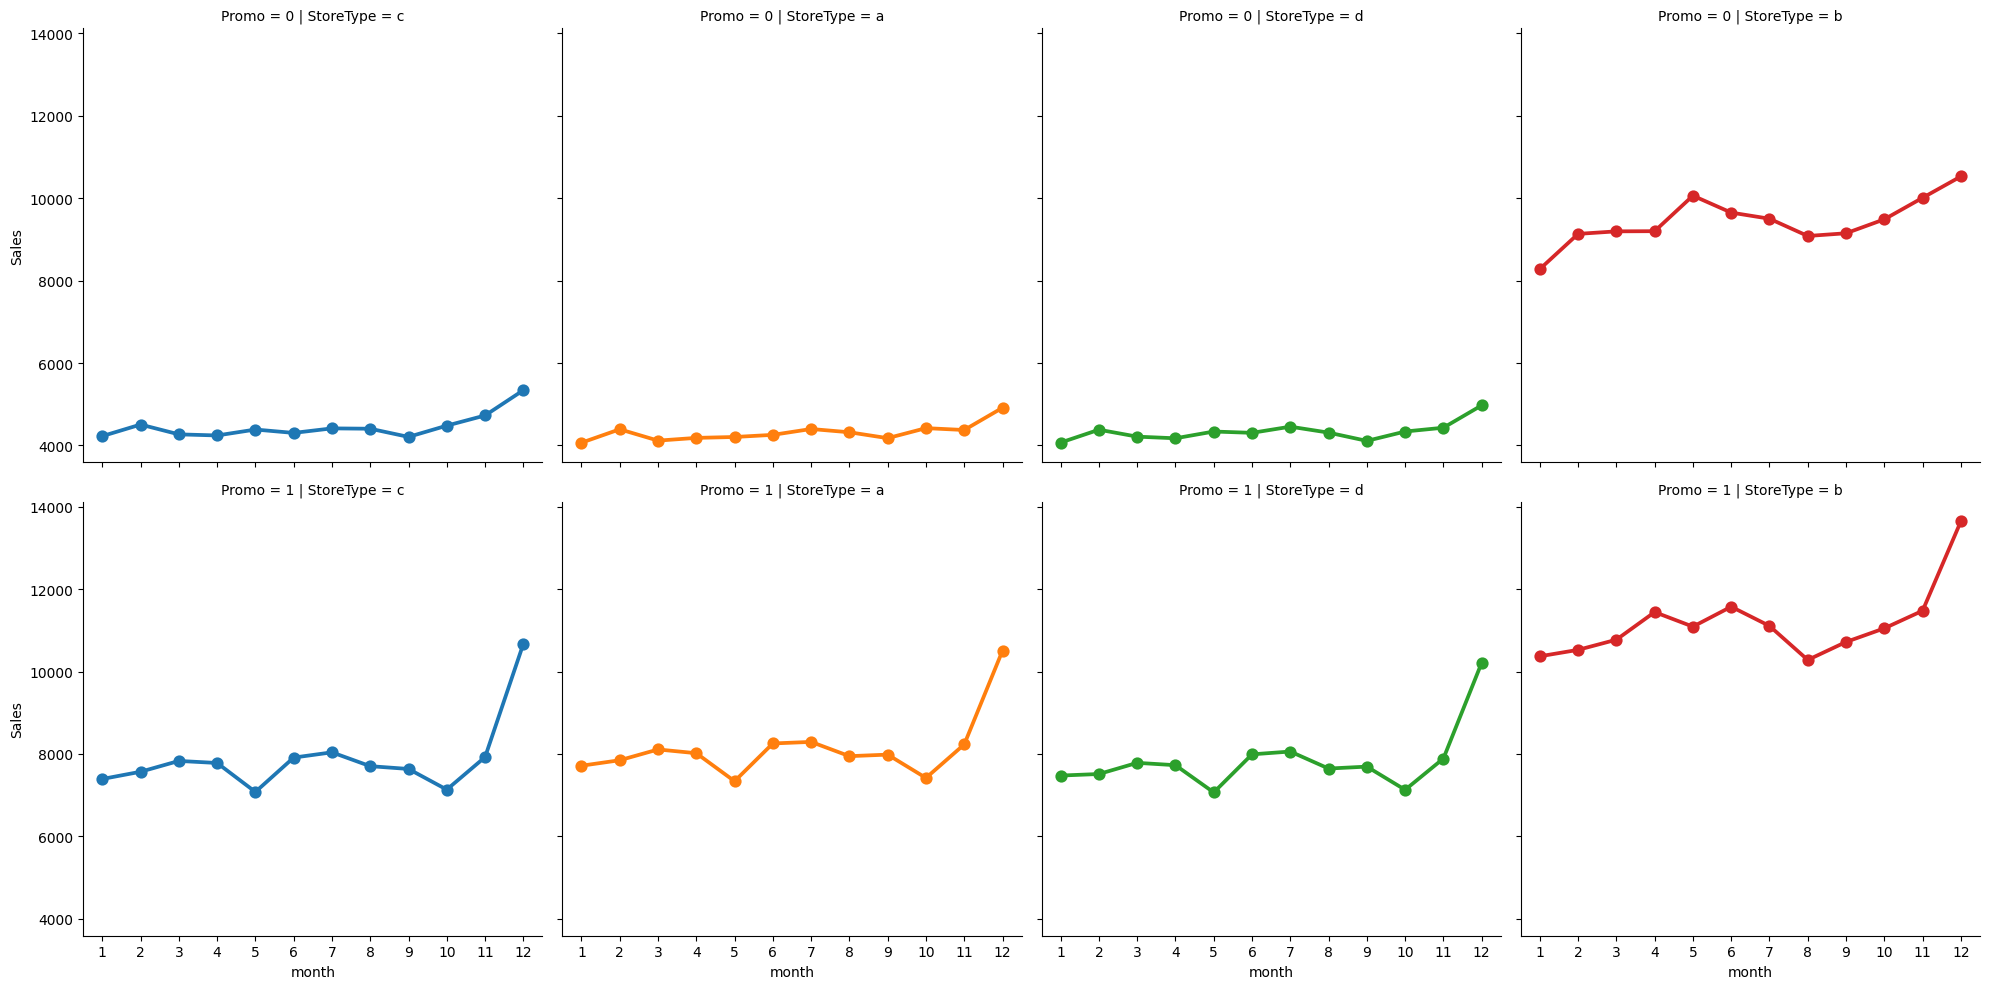

In [ ]:
# Chart - 8 visualization code

sns.catplot(x ='Month', y ='Sales', data = df, row ='Promo', col ='StoreType', hue ='StoreType', kind="point", ci = None)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

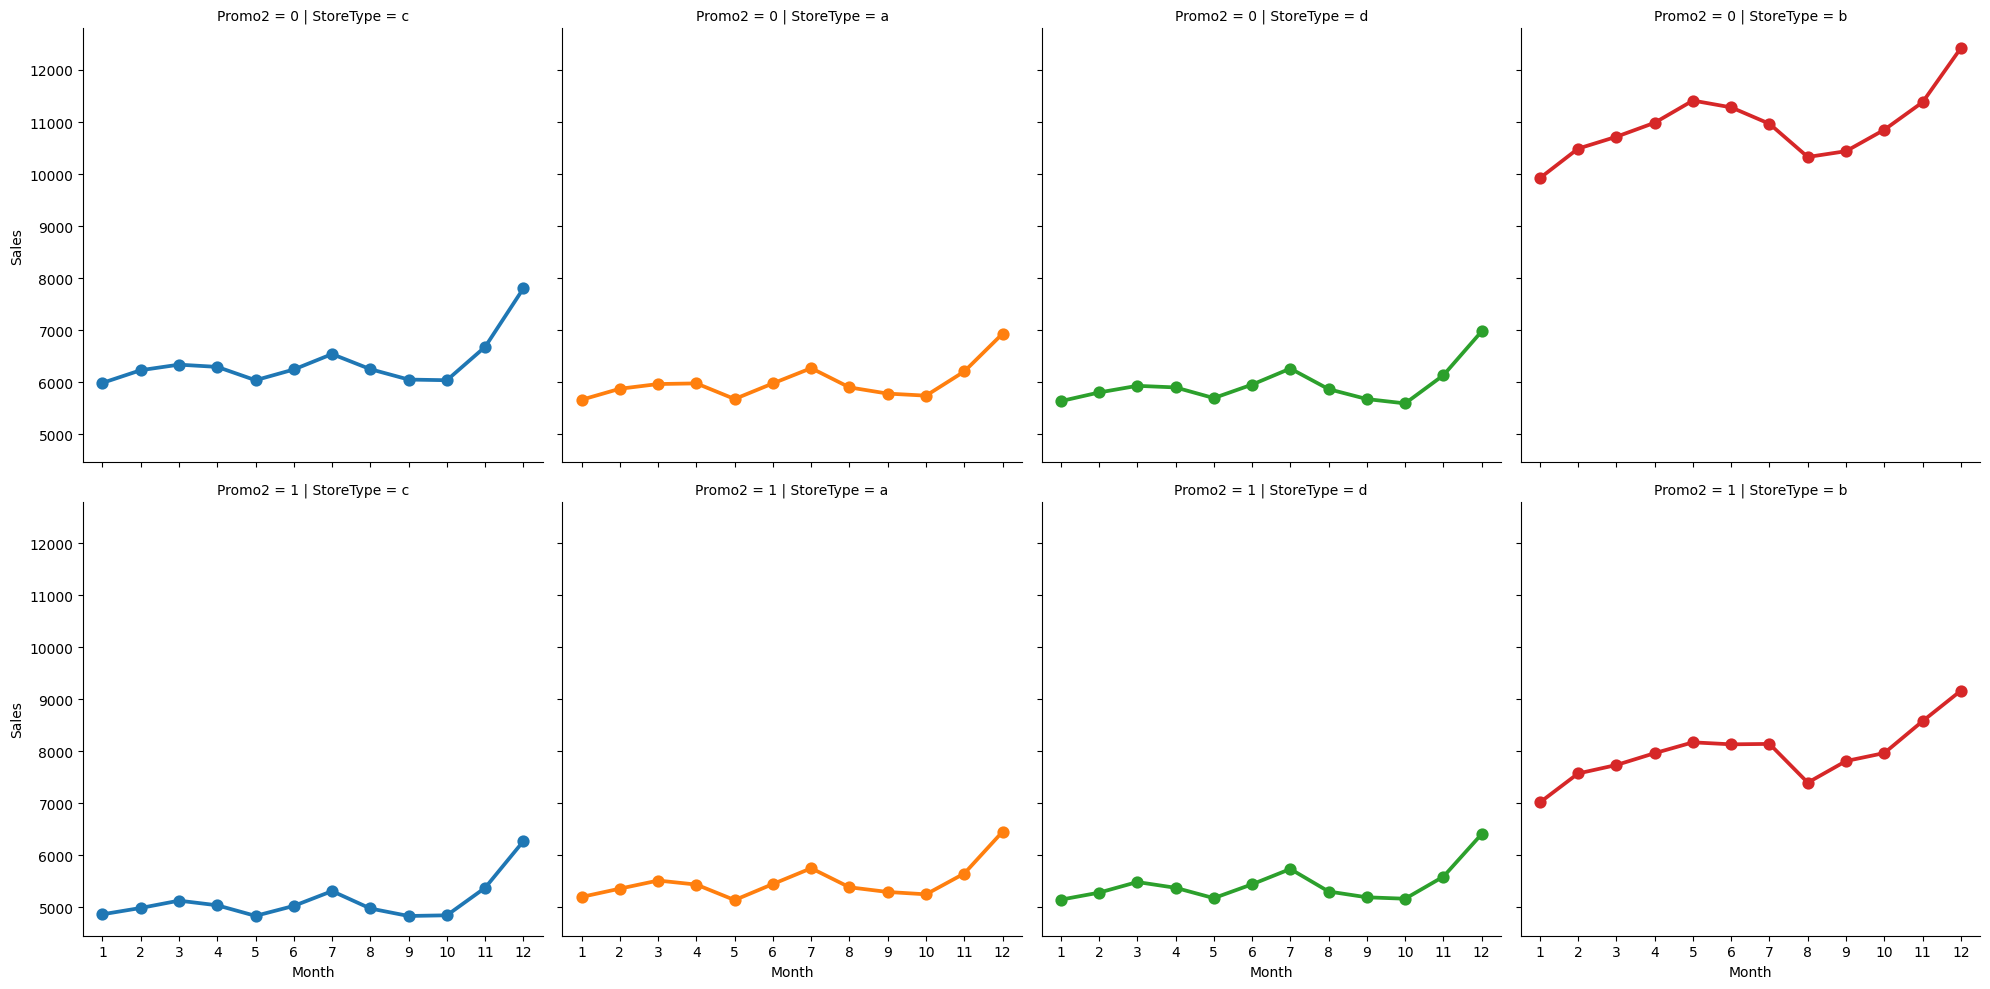

In [ ]:
# Chart - 9 visualization code

sns.catplot(x ='Month', y ='Sales', data = df, row ='Promo2', col ='StoreType', hue ='StoreType', kind="point", ci = None)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

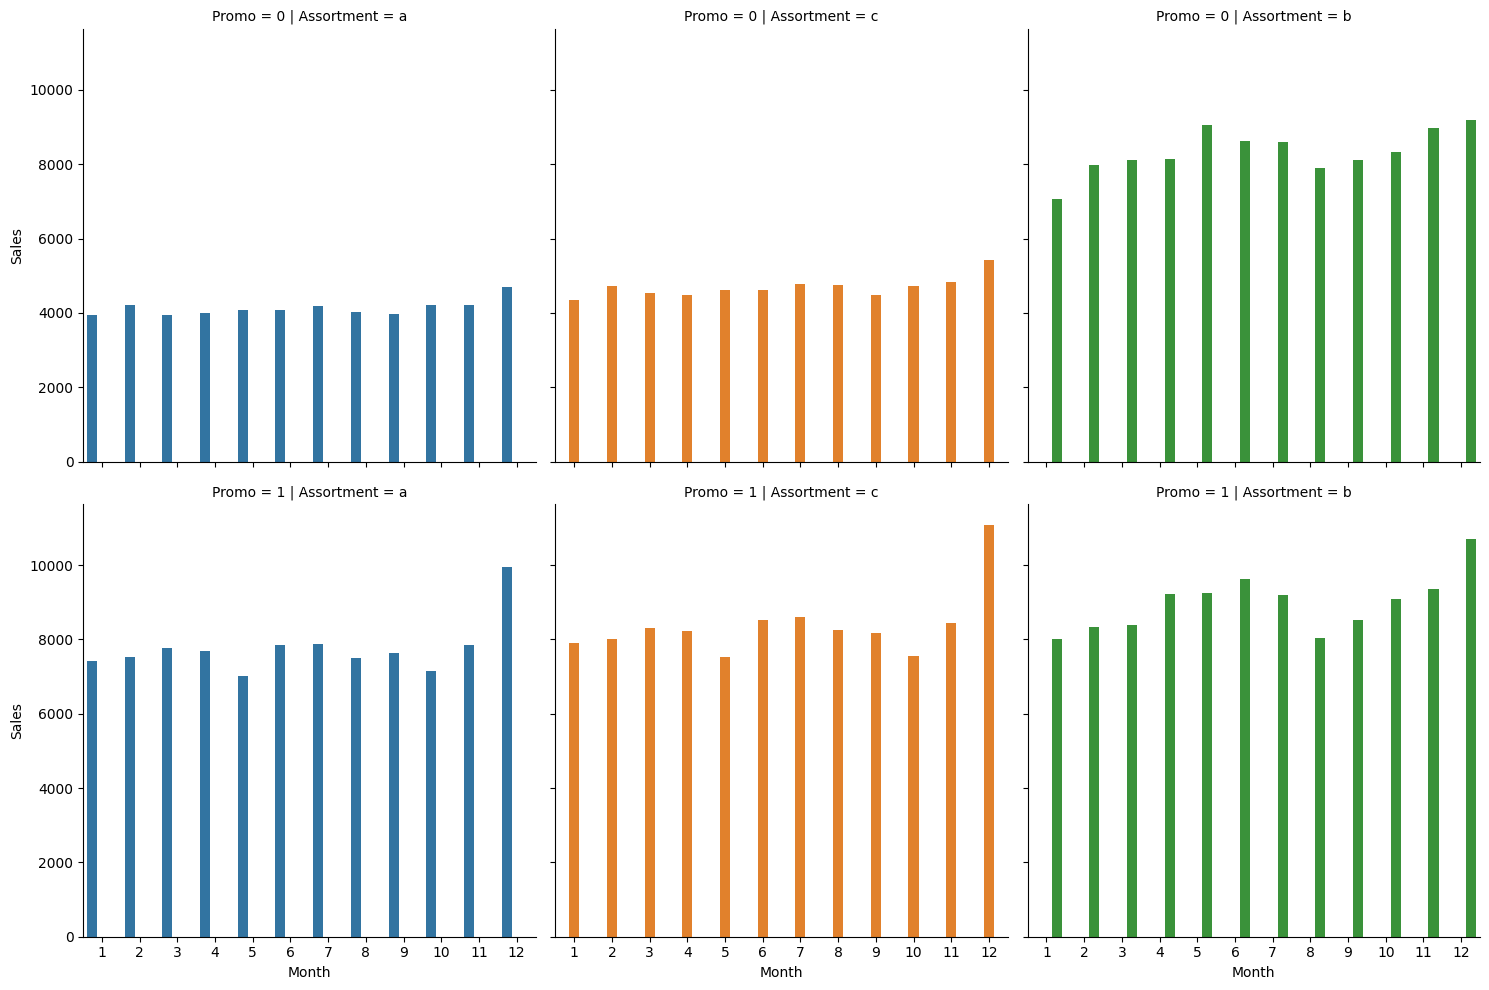

In [ ]:
# Chart - 10 visualization code

sns.catplot(x ='Month', y ='Sales', data = df, row ='Promo', col ='Assortment', hue ='Assortment', kind = 'bar', ci = None)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

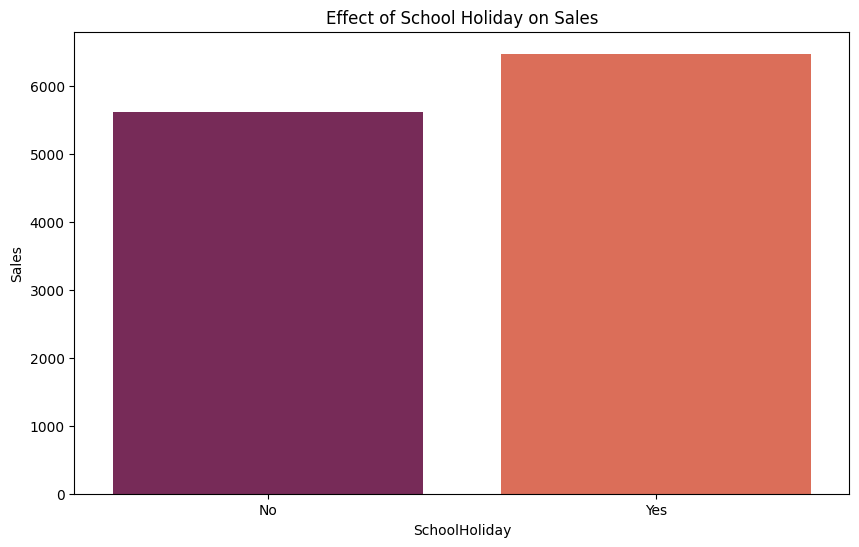

In [ ]:
# Chart - 11 visualization code

# Bar plot to check if there is any effect of school holidays on sales
sns.barplot(x ='SchoolHoliday', y ='Sales', data = df, palette ='rocket', ci = None)
plt.title('Effect of School Holiday on Sales')
plt.xticks([0,1],labels = ['No','Yes'])

# Setting the display figure size using rcParams method
plt.rcParams['figure.figsize'] = (10, 6)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

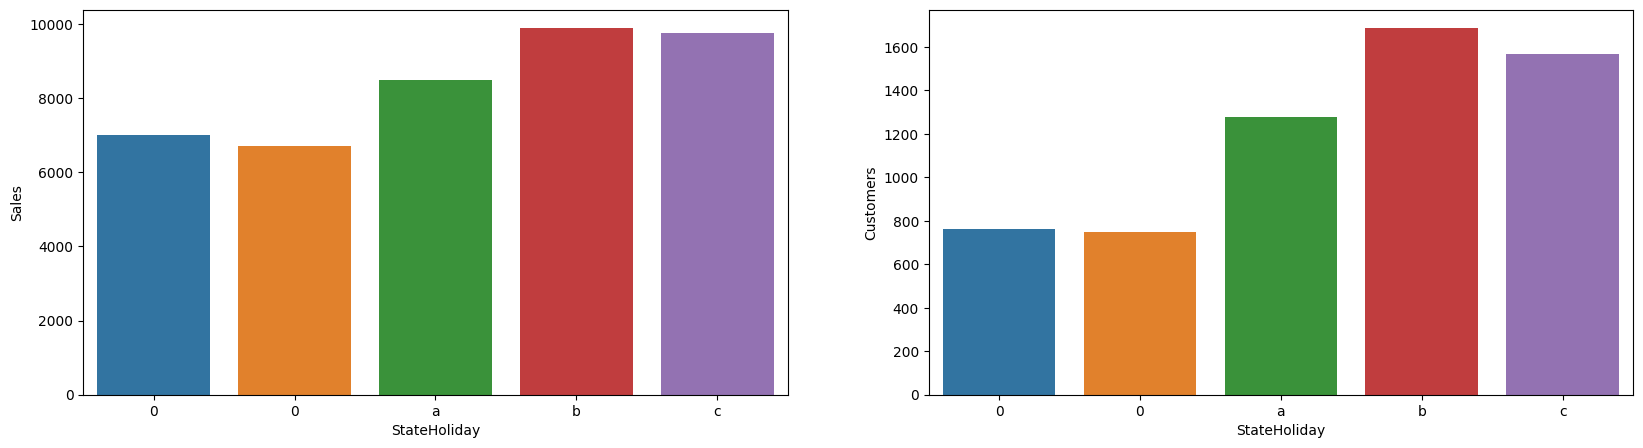

In [ ]:
# Chart - 12 visualization code

# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='StateHoliday', y ='Sales', data = df[df['Open'] != 0], ax = ax1, ci = None)
sns.barplot(x ='StateHoliday', y ='Customers', data = df[df['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

In [ ]:
# Checking for unique values in StateHoliday

df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [7]:
# Mapping the value of '0' to state holidays 0. This is done to remove differentiation between 0 and '0'

df['StateHoliday'] = ['0' if i == 0 else i for i in df['StateHoliday']]

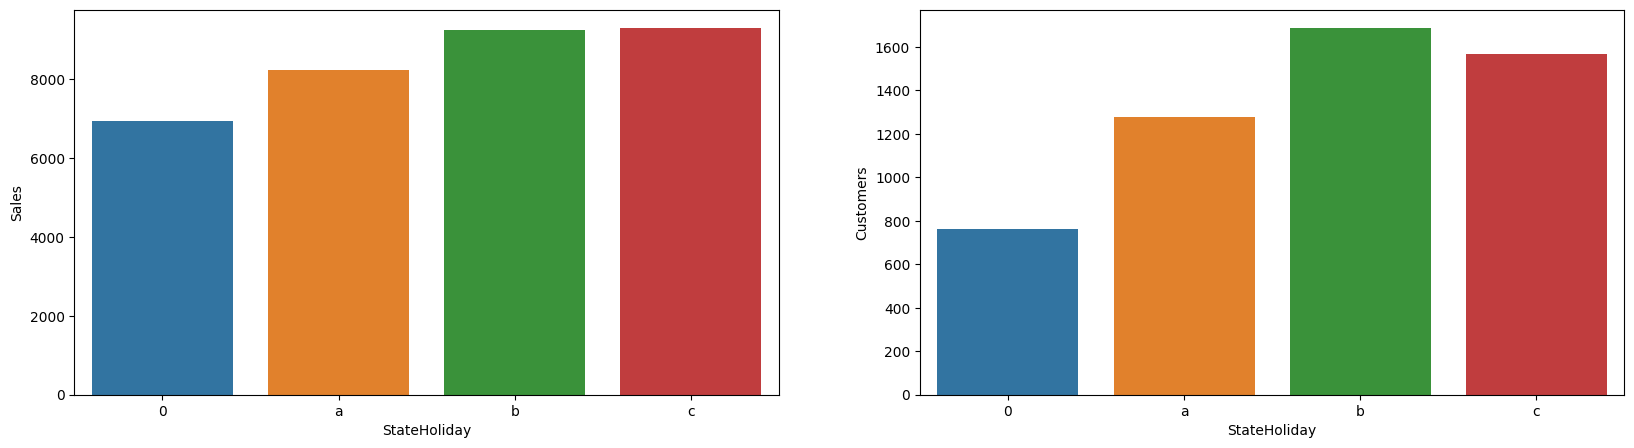

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='StateHoliday', y ='Sales', data = df[df['Open'] != 0], ax = ax1, ci = None)
sns.barplot(x ='StateHoliday', y ='Customers', data = df[df['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

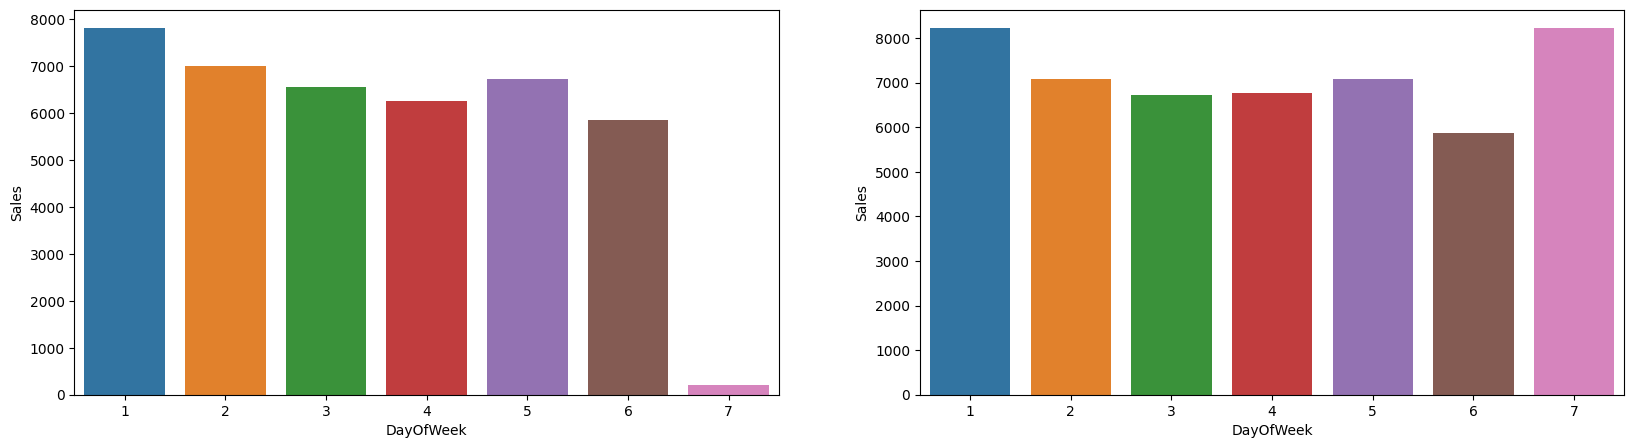

In [ ]:
# Chart - 13 visualization code

# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='DayOfWeek', y ='Sales', data = df, ax = ax1, ci =None)
sns.barplot(x ='DayOfWeek', y ='Sales', data = df[ df['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

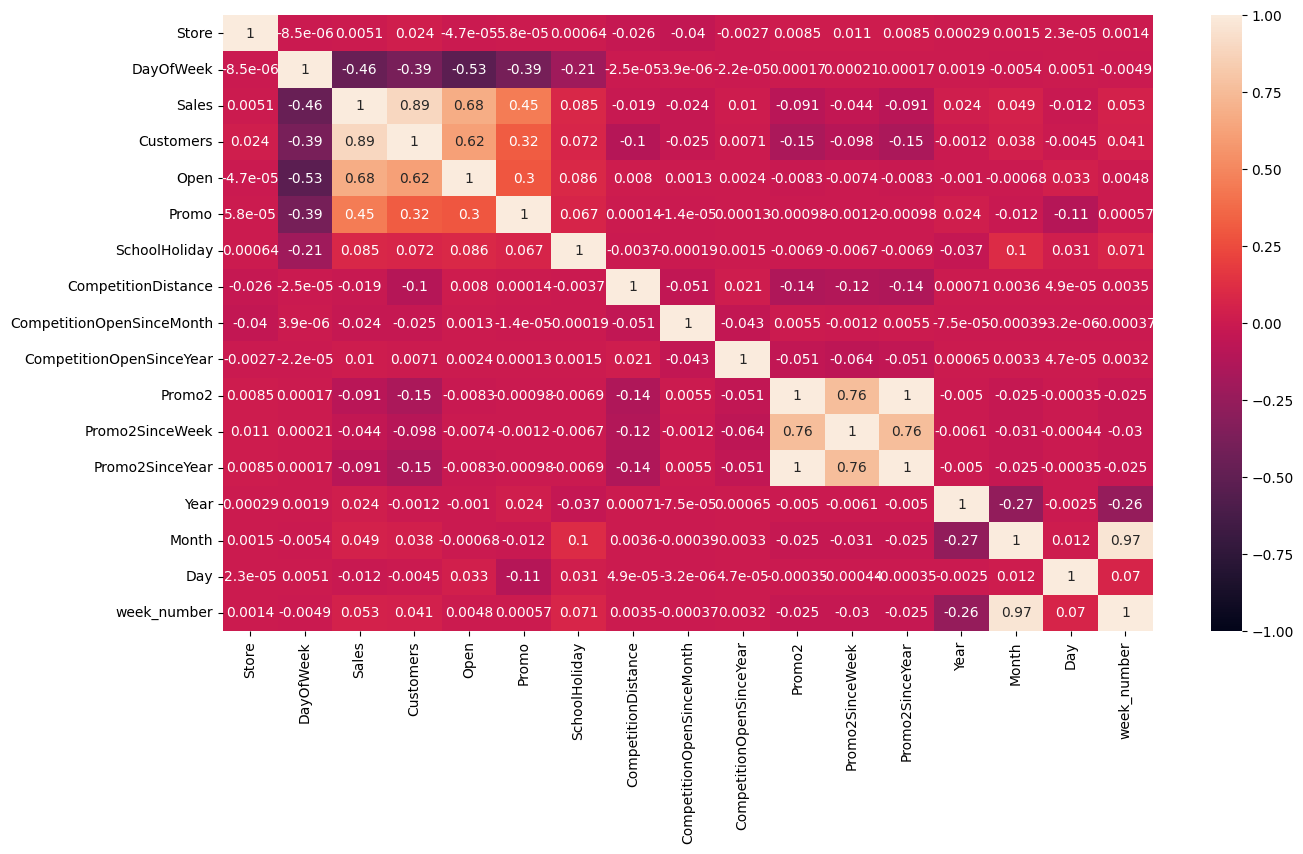

In [ ]:
# Correlation Heatmap visualization code

# Setting the plot size
f, ax = plt.subplots(figsize=(15,8))

# Creating a heat map of 'store' to find correlation
sns.heatmap(df.corr(),  vmin=-1, annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the above heat map, we can see that:

* Sales has a high correlation with customers, day of the week, and whether the store is open and participating in promotional offer.

* Week number has a high correlation with month.

* The features Promo2, Promo2SinceWeek and Promo2SinceYear are highly correlated. So, these features need to be rationalized.

#### Chart - 15 - Pair Plot

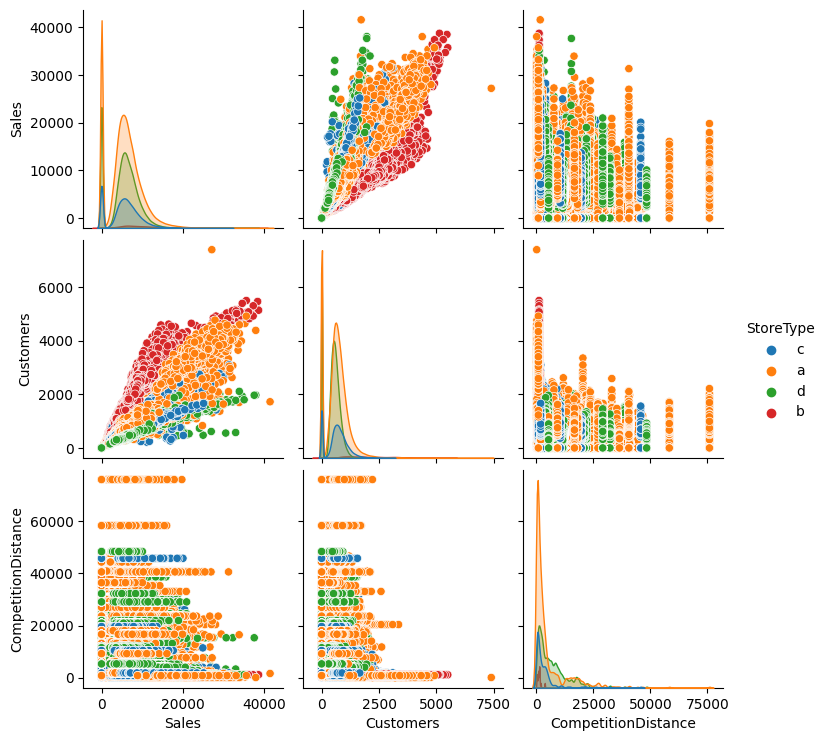

In [ ]:
# Pair Plot visualization code

# Pair Plot visualization code
sns.pairplot(df, vars = ['Sales', 'Customers', 'CompetitionDistance'], hue="StoreType")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The hypothesis that I would like to test are:

1. The average sales in store type 'b' is atleast 50% higher than that of store type 'a' (i.e. majority of the stores).

2. Promo2 does not affect sales i.e. sales in stores running Promo2 is equal to sales in stores not running Promo2.

3. Sales is affected (i.e. lesser sales than average) if the competition distance is less than 2,000 meters.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average sales in store type 'b' is atleast 50% higher than that of store type 'a'.

Null Hypothesis     : S_b = 1.5 * S_a

Alternate Hypothesis: S_b < 1.5 * S_a

Test Type: Left Tailed Test

In [ ]:
from scipy.stats import *
from statsmodels.stats.weightstats import ztest

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Checking for information about missing values in all the columns

print("The number of missing/null values in each feature of the dataset : \n",df.isnull().sum())

The number of missing/null values in each feature of the dataset : 
 Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


There are 6 columns with missing\null values:

'CompetitionDistance ', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'.

In [8]:
# Handling Missing Values & Missing Value Imputation

# Filling the null values in 'CompetitionDistance', 'CompetitionOpenSinceMonth and 'CompetitionOpenSinceYear' with the respective median value
df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace = True)
df.CompetitionOpenSinceMonth.fillna(df.CompetitionOpenSinceMonth.median(), inplace = True)
df.CompetitionOpenSinceYear.fillna(df.CompetitionOpenSinceYear.median(), inplace = True)

In [ ]:
# Checking for value count of 'Promo2'
df['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

There are 509,178 observations that belong to Rossmann stores participating in Promo2 and 508,031 observations that pertain to Rossmann stores that are not participating in Promo2.

In [9]:
# Filling the null values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' with 0
df.Promo2SinceWeek.fillna(0, inplace = True)
df.Promo2SinceYear.fillna(0, inplace = True)
df.PromoInterval.fillna('0', inplace = True)

In [ ]:
# Counting total missing/null values in each column of the dataset to check if there are any such cases left
print("The number of missing/null values in each feature of the dataset : \n",df.isnull().sum())

The number of missing/null values in each feature of the dataset : 
 Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

* The null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' can be handled in multiple ways. We can do mean or median imputation. Alternatively, we can also impute the maximum value of competition distance or simply assign 0, meaning there is no competition. It is not proper to go with the latter option because generally, stores do have competition in their vicinity. It is also not appropriate to do mean imputation as the presence of outliers affects the mean.

* I have therefore filled all the null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with their respective median values.


* The count of observations from stores that are not participating in Promo2 (i.e. 508031) is the same as the number of null observations in the columns- 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval'. This implies that these observations in the mentioned three columns have missing/null values, because they pertain to the stores which are not running Promo2.

* Hence, I filled the null observations in the columns: 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval' with the value 0.

### 2. Handling Outliers

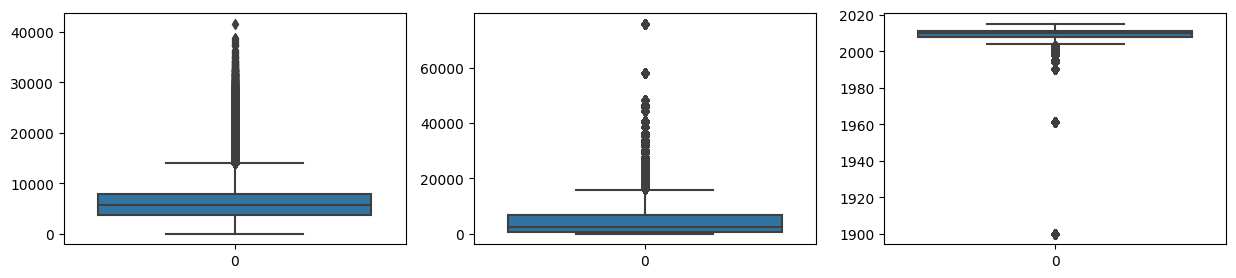

In [ ]:
# Handling Outliers & Outlier treatments

# Creating a list of columns that contain numerical data with possible outliers
columns = ['Sales','CompetitionDistance','CompetitionOpenSinceYear']

# Setting the display figure size
plt.figure(figsize=(15,3))

n = 1

# Creating boxplots for each of the column/features
for col in columns:
  plt.subplot(1,3,n)
  n = n+1
  sns.boxplot(df[col])

In [10]:
# Setting a value of 20000 to all the observations of 'Sales' that are greater than 20000
df.loc[df.Sales > 20000, 'Sales'] = 20000

# Setting a value of 20000  to all the observations of 'CompetitionDistance' that are greater than 20000
df.loc[df.CompetitionDistance > 20000 , 'CompetitionDistance'] = 20000

# Setting a value of 2000 to all the observations of 'CompetitionOpenSinceYear' that are less than 2000
df.loc[df.CompetitionOpenSinceYear < 2000, 'CompetitionOpenSinceYear'] = 2000

##### What all outlier treatment techniques have you used and why did you use those techniques?

I handled these outliers by assigning a value for all the observations beyond the whiskers of the box plot i.e. observations beyond Q3+1.5IQR and Q1–1.5*IQR

### 3. Categorical Encoding

In [11]:
# Doing One-Hot encoding of the categorical columns

new_df = pd.get_dummies(df, columns = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])
new_df.shape


(1017209, 33)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have done one-hot encoding of all the categorical columns.

I preferred one-hot encoding technique over label encoding technique to avoid the problem of ordinality as there are multiple categories in each of these columns.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

<b> Not Applicable

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [12]:
# Manipulate Features to minimize feature correlation and create new features

# Creating a column  'CompetitionOpen' and assigning the value of 0 to all the observations
new_df['CompetitionOpen'] = 0

# For all the non-zero observations of 'CompetitionOpenSinceYear', 'CompetitionOpen' takes the value of the total period for which the competitor existed
new_df['CompetitionOpen'] = new_df['CompetitionOpen'].where(new_df['CompetitionOpenSinceYear'] == 0,
                                                          other =(12 * (new_df['Year'] - new_df['CompetitionOpenSinceYear']) +
                                                                  (new_df['Month'] - new_df['CompetitionOpenSinceMonth'])))

# All the negative values of CompetitionOpen are set to 0
new_df['CompetitionOpen'] = new_df['CompetitionOpen'].where(new_df['CompetitionOpen'] > 0, other = 0)

I created a new column 'CompetitionOpen' to calculate the number of months since the nearest competitor store has opened.

Similarly, I create a new column 'Promo2open' to calculate the number of
months since the time the store has begun participating in Promo2.

In [13]:
# Creating a column  'Promo2open' and assigning the value of 0 to all the observations
new_df['Promo2open'] = 0

# For all the non-zero observations of 'Promo2SinceYear', 'Promo2open' takes the value of the total period for which the store has been running Promo2
new_df['Promo2open'] = new_df['Promo2open'].where(new_df['Promo2SinceYear'] == 0,
                                                other = (12 * (new_df['Year'] - new_df['Promo2SinceYear']) +
                                                         (new_df['week_number'] - new_df['Promo2SinceWeek'])/4))

# All the negative values of Promo2open are set to 0
new_df['Promo2open'] = new_df['Promo2open'].where(new_df['Promo2open'] > 0, other = 0)

#### 2. Feature Selection

'CompetitionOpen' contains the information provided by 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' columns. So, the latter two columns can be dropped.

The information provided by the variable 'Promo2' (i.e. whether the store runs promo2 or not) is contained within the column 'PromoInterval'. So, Promo2 can be dropped.

'Promo2open' contains the information provided by Promo2SinceWeek' and 'Promo2SinceYear' columns. So, the latter two columns can be dropped.

'Date', 'Year' and 'week_number' are some other redundant columns that may be dropped.


Sales is possible only if the store is open. So for the purpose of training the model, I will be considering only those observations in which the store is open and sales is greater than 0.

In [14]:
# Keeping only those observations in the dataset in which the store is Open and Sales > 0
new_df = new_df[ (new_df['Open'] == 1) & (new_df['Sales'] > 0) ]
new_df.shape

(844338, 35)

Post removal of all the observations where the store is closed, the feature 'Open' becomes redundant. So, the column 'Open' may be dropped.

In [15]:
# Dropping all the unwanted columns
new_df.drop(columns = ['Date','Year','week_number','Open','Customers','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                       'Promo2','Promo2SinceWeek','Promo2SinceYear'], inplace = True)
new_df.shape

(844338, 25)

Variance Inflation Factor (VIF) is used to identify the correlation of one independent variable with a group of other variables.

VIF = 1 → No correlation

VIF = 1 to 5 → Moderate correlation

VIF > 10 → High correlation


In [16]:
# Checking for Multicollinearity

# Defining a function for calculating VIF
def calc_vif(X):

    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
# Calculating VIF for all the numeric variables
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c',
                                                                   'StoreType_a','StoreType_b','StoreType_c','StoreType_d',
                                                                   'Assortment_a','Assortment_b','Assortment_c',
                                                                   'PromoInterval_0','PromoInterval_Feb,May,Aug,Nov','PromoInterval_Jan,Apr,Jul,Oct',
                                                                   'PromoInterval_Mar,Jun,Sept,Dec']]])

,Variables,VIF
0,Store,3.546638
1,DayOfWeek,4.153832
2,Sales,5.951435
3,Promo,2.196303
4,SchoolHoliday,1.272402
5,CompetitionDistance,1.649503
6,Month,3.796910
7,Day,3.717182
8,CompetitionOpen,2.577355
9,Promo2open,1.463843


VIF < 10 indicates that the correlation between the independant variables is within tolerable limits. Hence, there is no problem of multicollinearity in our dataset.

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Out of all the numeric columns, 'Sales', 'CompetitionDistance', 'CompetitionOpen' and 'Promo2Open' are the features that may require some transformation.

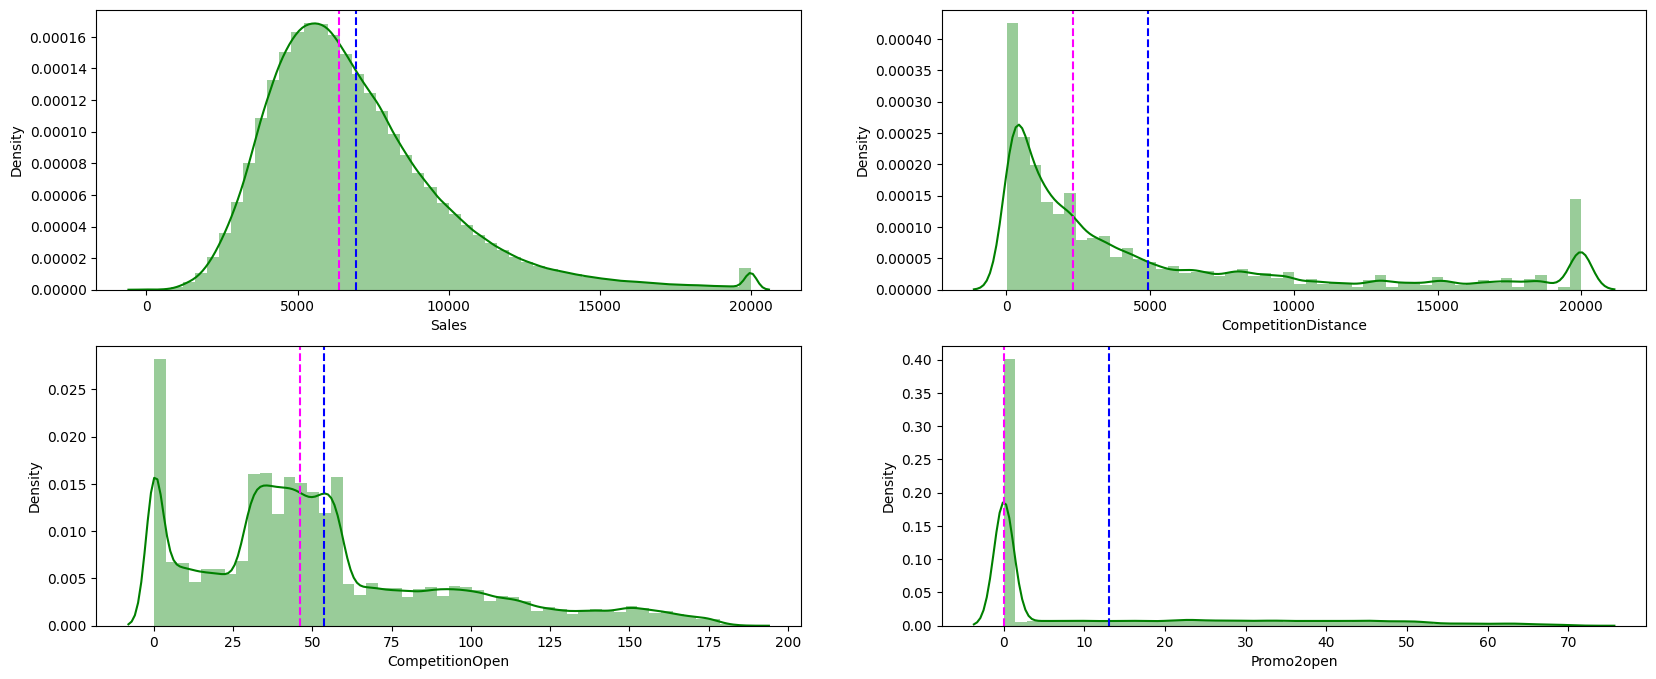

In [ ]:
features = ['Sales','CompetitionDistance','CompetitionOpen','Promo2open']

fig = plt.figure(figsize = (20,8))
ax1=fig.gca()

i=0
n=0
while i<2:
  j=0
  while j<2:
    ax1 = plt.subplot2grid((2,2),(i,j))
    sns.distplot(new_df[features[n]], color = 'g')
    ax1.axvline(new_df[features[n]].mean(),color='blue', linestyle='dashed')
    ax1.axvline(new_df[features[n]].median(),color='magenta', linestyle='dashed')
    j=j+1
    n=n+1
  i=i+1

plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
# Checking for skewness of the original data in 'Sales','CompetitionDistance','CompetitionOpen' and 'Promo2open'
df_features = pd.DataFrame()
df_features = new_df[features]
df_features.skew(axis = 0, skipna = True)

Sales                  1.322097
CompetitionDistance    1.436868
CompetitionOpen        0.942423
Promo2open             1.227860
dtype: float64

In [ ]:
# Performing log transformation of the features
ln_features = ['ln_Sales','ln_CompetitionDistance','ln_Promo2open','ln_CompetitionOpen']
k=0
df_transform = pd.DataFrame()
while k<len(ln_features):
  df_transform [ln_features[k]] = new_df[features[k]].map(lambda x : np.log(x) if x != 0 else 0)
  k=k+1

# Checking skewness of the log transformed features
df_transform.skew(axis = 0, skipna = True)

ln_Sales                 -0.680590
ln_CompetitionDistance   -0.441449
ln_Promo2open            -1.514735
ln_CompetitionOpen        0.530722
dtype: float64

In [ ]:
# Performing square root transformation of the features
sqrt_features = ['sqrt_Sales','sqrt_CompetitionDistance','sqrt_Promo2open','sqrt_CompetitionOpen']
k=0
df_transform = pd.DataFrame()
while k<len(sqrt_features):
  df_transform [sqrt_features[k]] = new_df[features[k]].map(lambda x : np.sqrt(x) if x != 0 else 0)
  k=k+1

# Checking skewness of the square root transformed features
df_transform.skew(axis = 0, skipna = True)

sqrt_Sales                  0.591436
sqrt_CompetitionDistance    0.746642
sqrt_Promo2open            -0.334911
sqrt_CompetitionOpen        0.707045
dtype: float64

· If the skewness is between -0.5 and 0.5, the data is fairly symmetrical

· If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data is moderately skewed

· If the skewness is less than -1 or greater than 1, the data is highly skewed

Based on the values of skewness obtained post transformation, it seems more appropriate to perform log-transformation of the 'CompetitionDistance' and 'CompetititonOpen' data and square-root transformation of 'Sales' and "Promo2open' data.

In [16]:
new_df['sqrt_Sales'] = new_df['Sales'].map(lambda x : np.sqrt(x) if x != 0 else 0)
new_df['ln_CompetitionDistance'] = new_df['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['ln_CompetitionOpen'] = new_df['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['sqrt_Promo2open'] = new_df['Promo2open'].map(lambda x : np.sqrt(x) if x != 0 else 0)

In [17]:
# Dropping the original un-transformed columns
new_df.drop(columns=['Sales','CompetitionDistance','CompetitionOpen','Promo2open'], inplace = True)

#Checking the remaining columns names and the shape of dataframe
new_df.columns

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Month', 'Day',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'sqrt_Sales',
       'ln_CompetitionDistance', 'ln_CompetitionOpen', 'sqrt_Promo2open'],
      dtype='object')

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not required in our case.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction was not done on our dataset.

### 7. Data Splitting

In [18]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = new_df.drop(['sqrt_Sales'], axis = 1)
y = new_df['sqrt_Sales'].values

X.shape, y.shape

((844338, 24), (844338,))

In [19]:
# split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

# describes info about train and test set
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (675470, 24)
Shape of y_train dataset:  (675470,)
Shape of X_test dataset:  (168868, 24)
Shape of y_test dataset:  (168868,)


##### What data splitting ratio have you used and why?

80:20 is the most commonly used ratio to split the dataset into train and test sets. I have used the same ratio

### 8. Data Scaling

##### Which method have you used to scale you data and why?

In [23]:
X.columns

Index(['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Month', 'Day',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'ln_CompetitionDistance',
       'ln_CompetitionOpen', 'sqrt_Promo2open'],
      dtype='object')

In [20]:
# Scaling certain features using standard scaler

scaler = StandardScaler()
X_train[['Store','DayOfWeek','Month','Day','ln_CompetitionDistance','ln_CompetitionOpen','sqrt_Promo2open']] = scaler.fit_transform(X_train[['Store','DayOfWeek','Month','Day','ln_CompetitionDistance','ln_CompetitionOpen','sqrt_Promo2open']])
X_test[['Store','DayOfWeek','Month','Day','ln_CompetitionDistance','ln_CompetitionOpen','sqrt_Promo2open']] = scaler.transform(X_test[['Store','DayOfWeek','Month','Day','ln_CompetitionDistance','ln_CompetitionOpen','sqrt_Promo2open']])


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

Linear Regression with Regularisation

In [ ]:
# ML Model - 1 Implementation

# Fitting Multiple Linear Regression model to the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the model
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [ ]:
# Printing the intercept and the coefficients of the linear regression model
print(f"Intercept: ",lr.intercept_, end = '\n\n')
print(f"Coefficients: ",lr.coef_)


Intercept:  -31851598516981.094

Coefficients:  [ 1.66579142e-02 -1.46634498e+00  1.29780010e+01  4.54250358e-01
  1.15458539e+00 -1.59538664e-01  1.06502330e+12  1.06502330e+12
  1.06502330e+12  1.06502330e+12  2.35589743e+13  2.35589743e+13
  2.35589743e+13  2.35589743e+13  4.80507017e+12  4.80507017e+12
  4.80507017e+12  2.42253078e+12  2.42253078e+12  2.42253078e+12
  2.42253078e+12 -1.72942819e+00 -5.05381062e-01  9.09934086e-01]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [21]:
# Defining a function to find the R squared, adjusted R squared, MSE and RMSE of the models
def metrics(train_pred, test_pred, model):

  print(f'The metrics for model prediction using {model} are:', end = '\n\n')
  print('R_squared = ', r2(y_test, test_pred), end = '\n\n')
  print('R_squared for training data set = ', r2(y_train,train_pred), end = '\n\n')
  print("Adjusted R_squared = ",1-(1-r2(y_test, test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), end = '\n\n')
  print('MSE = ', mse(y_test, test_pred), end = '\n\n')
  print('RMSE = ', math.sqrt(mse(y_test, test_pred)), end = '\n\n')
  print('RMSE for training data set = ', math.sqrt(mse(y_train, train_pred)), end = '\n\n')
  print('RMSPE = ', np.sqrt(np.mean(np.square((y_test - test_pred) / y_test))) * 100)

In [ ]:
metrics(y_train_pred, y_test_pred, 'Linear Regression')

The metrics for model prediction using Linear Regression are:

R_squared =  0.23229035361910932

R_squared for training data set =  0.23415895138346599

Adjusted R_squared =  0.23218122838730737

MSE =  229.59519393399358

RMSE =  15.152398949803084

RMSE for training data set =  15.11065629508619

RMSPE =  20.08483064621908


<Axes: >

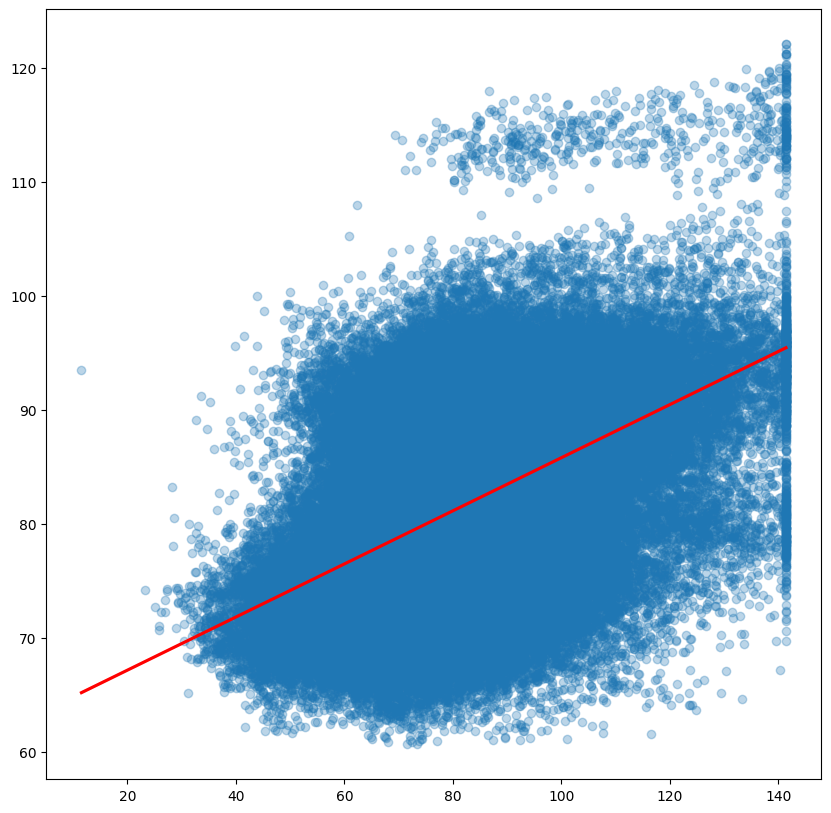

In [ ]:
plt.figure(figsize=(10,10))

# Drawing a regression plot for the test data prediction
sns.regplot(x = y_test, y = y_test_pred, line_kws = {"color": "red"}, scatter_kws = {'alpha':0.3})

Lasso Regression

In [ ]:
lasso  = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

# Predicting the y values with the trained lasso model
y_pred_l = lasso.predict(X_test)
y_pred_train_l = lasso.predict(X_train)

print(f"Lasso Regression_Intercept: ",lasso.intercept_, end = '\n\n')
print(f"Lasso Regression_Coefficients: ",lasso.coef_)

Lasso Regression_Intercept:  71.66202663728141

Lasso Regression_Coefficients:  [-0.         -1.41034876 12.61167577  0.          1.0939896  -0.07057831
  0.         -0.         -0.          0.         -0.13800408 11.99726916
 -0.          0.         -0.         -0.          4.46936362  4.10201064
 -0.          0.46964864 -2.03727517 -1.59666552 -0.37495416  0.18386427]


In [ ]:
metrics(y_pred_train_l, y_pred_l, 'Lasso Regression')

The metrics for model prediction using Lasso Regression are:

R_squared =  0.2260097902019368

R_squared for training data set =  0.22811627163027237

Adjusted R_squared =  0.22589977222644986

MSE =  231.47349152029884

RMSE =  15.214252907070358

RMSE for training data set =  15.170152617201012

RMSPE =  20.186126387401682


Ridge Regression

In [ ]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

y_pred_r = ridge.predict(X_test)
y_pred_train_r = ridge.predict(X_train)

print(f"Ridge Regression_Intercept: ", ridge.intercept_, end = '\n\n')
print(f"Ridge Regression_Coefficients: ",  ridge.coef_)

Ridge Regression_Intercept:  72.18924826172291

Ridge Regression_Coefficients:  [ 1.64842965e-02 -1.46077223e+00  1.29794561e+01  4.57290209e-01
  1.15538738e+00 -1.56190999e-01  2.70695060e+00 -5.08637227e-01
 -1.33073437e+00 -8.67579047e-01 -6.10362509e+00  1.79025258e+01
 -6.02219157e+00 -5.77670430e+00  2.10108368e+00 -9.26313372e+00
  7.16205166e+00  4.75471125e+00 -1.43211809e+00  2.34197558e-01
 -3.55679171e+00 -1.73165642e+00 -5.05011935e-01  9.03605223e-01]


In [ ]:
metrics(y_pred_train_r, y_pred_r, 'Ridge Regression')

The metrics for model prediction using Ridge Regression are:

R_squared =  0.23228952373021616

R_squared for training data set =  0.23415803547388947

Adjusted R_squared =  0.23218039838045057

MSE =  229.59544212483274

RMSE =  15.152407139620845

RMSE for training data set =  15.110665330897666

RMSPE =  20.08569982154548


Elastic Net Regression

In [ ]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elasticnet.fit(X_train,y_train)

y_pred_en = elasticnet.predict(X_test)
y_pred_train_en = elasticnet.predict(X_train)

print(f"Elastic Net Regression_Intercept: ", elasticnet.intercept_, end = '\n\n')
print(f"Elastic Net Regression_Coefficients: ",  elasticnet.coef_)

Elastic Net Regression_Intercept:  76.66564129012623

Elastic Net Regression_Coefficients:  [-0.         -1.64036867 10.48130291  0.13400667  1.08573776 -0.24325787
 -0.          0.          0.          0.         -0.80871555  3.37944434
 -0.30847656 -0.26187536 -2.52042792  0.          1.54401612  3.07614205
 -0.79028609  0.         -2.14521414 -1.63579065 -0.38196147 -0.        ]


In [ ]:
metrics(y_pred_train_en, y_pred_en, 'Elastic Net Regression')

The metrics for model prediction using Elastic Net Regression are:

R_squared =  0.2125734625628356

R_squared for training data set =  0.2143478696033112

Adjusted R_squared =  0.21246153469553586

MSE =  235.49182874531994

RMSE =  15.345743017049385

RMSE for training data set =  15.304852669073792

RMSPE =  20.377819512001956


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementing Lasso Regression model with Cross validation and hyperparameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,20,40,50,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso = lasso_regressor.predict(X_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, ", the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001} , the negative mean squared error is:  -228.34855128142536


In [ ]:
metrics(y_pred_train_lasso, y_pred_lasso, 'Lasso Regression with hyperparameter tuning')

The metrics for model prediction using Lasso Regression with hyperparameter tuning are:

R_squared =  0.23230135432141186

R_squared for training data set =  0.23415236758460456

Adjusted R_squared =  0.23219223065329253

MSE =  229.5919040074042

RMSE =  15.152290388169183

RMSE for training data set =  15.110721246754736

RMSPE =  20.08661884217433


In [ ]:
# Implementing Ridge Regression model with Cross validation and hyperparameter tuning

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,10,20,40,50,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error', cv = 5)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, ", the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 40}

Using  {'alpha': 40} , the negative mean squared error is:  -228.35052800609242


In [ ]:
metrics(y_pred_train_ridge, y_pred_ridge, 'Ridge Regression with hyperparameter tuning')

The metrics for model prediction using Ridge Regression with hyperparameter tuning are:

R_squared =  0.2322846335116303

R_squared for training data set =  0.23415674664755914

Adjusted R_squared =  0.2321755074667501

MSE =  229.59690461874553

RMSE =  15.152455399002022

RMSE for training data set =  15.110678045671769

RMSPE =  20.085967930526753


In [ ]:
# Implementing Elastic Net Regression model with Cross validation and hyperparameter tuning

elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-5,1e-3,1e-1,1,5,10,20,40,60,100,200],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring ='neg_mean_squared_error', cv = 3)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)

# Model Prediction
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred_train_elastic = elastic_regressor.predict(X_train)

print("The best fit alpha and l1 ratio is found out to be :" , elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, ", the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha and l1 ratio is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.3}

Using  {'alpha': 1e-05, 'l1_ratio': 0.3} , the negative mean squared error is:  -228.3552844935181


In [ ]:
metrics(y_pred_train_elastic, y_pred_elastic, 'Elastic Net Regression with hyperparameter tuning')

The metrics for model prediction using Elastic Net Regression with hyperparameter tuning are:

R_squared =  0.23228880407429087

R_squared for training data set =  0.2341579983492077

Adjusted R_squared =  0.23217967862223066

MSE =  229.59565734883378

RMSE =  15.152414241593112

RMSE for training data set =  15.11066569714727

RMSPE =  20.085750016129957


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

Decision Trees

In [ ]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train,y_train)

y_pred_dt = decision_model.predict(X_test)
y_pred_train_dt = decision_model.predict(X_train)

In [ ]:
metrics(y_pred_train_dt, y_pred_dt, 'Decision Tree')

The metrics for model prediction using Decision Tree are:

R_squared =  0.8337445234108599

R_squared for training data set =  1.0

Adjusted R_squared =  0.8337208912114904

MSE =  49.721217611396

RMSE =  7.051327365212595

RMSE for training data set =  5.008986998597505e-15

RMSPE =  9.032072060914695


We can see that the model prediction in case of the training data set is extremely good having an R_squared of 1, but that of the test data pales in comparison. This is a clear case of overfitting of the model.

So, we need to pre-prune the tree.

In [ ]:
d_tree = DecisionTreeRegressor(max_depth = 20)
d_tree.fit(X_train,y_train)

y_pred_dt = d_tree.predict(X_test)
y_pred_train_dt = d_tree.predict(X_train)

metrics(y_pred_train_dt, y_pred_dt, 'Decision Tree')

The metrics for model prediction using Decision Tree are:

R_squared =  0.7712836386097555

R_squared for training data set =  0.8386710644237025

Adjusted R_squared =  0.7712511279775506

MSE =  68.40109095518282

RMSE =  8.270495206164068

RMSE for training data set =  6.935378075643643

RMSPE =  10.785897158309634


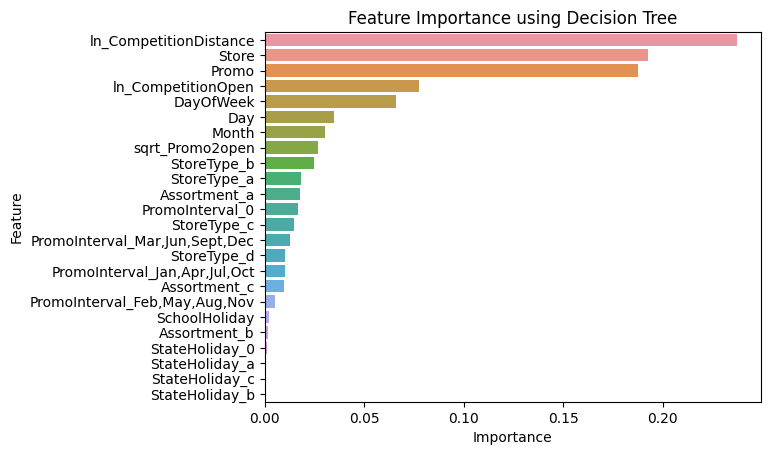

In [ ]:
importance_dt = pd.DataFrame({'Feature': X.columns,
                              'Importance': d_tree.feature_importances_}
                             ).sort_values('Importance', ascending = False)
sns.barplot(data = importance_dt, x ='Importance', y ='Feature')
plt.title('Feature Importance using Decision Tree')
plt.rcParams['figure.figsize'] = (10, 6)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 20)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)


In [ ]:
metrics(y_pred_train_rf, y_pred_rf, 'Random Forest')

The metrics for model prediction using Random Forest are:

R_squared =  0.8455287461434334

R_squared for training data set =  0.8837519779097113

Adjusted R_squared =  0.8455067889992667

MSE =  46.19696737382087

RMSE =  6.796835099796144

RMSE for training data set =  5.8871729323828115

RMSPE =  9.00503956689728


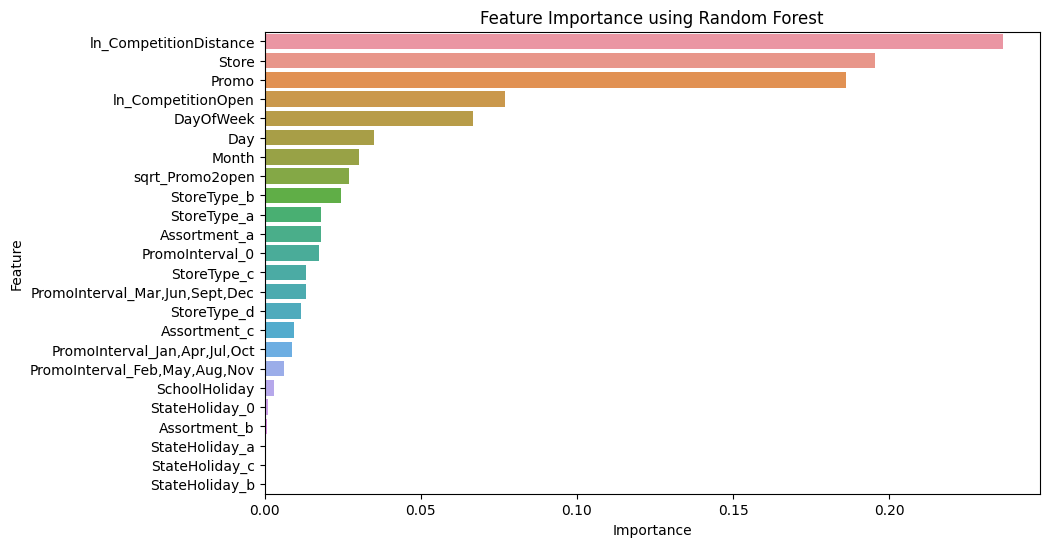

In [ ]:
importance_rf = pd.DataFrame({'Feature': X.columns,
                              'Importance': rf.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_rf, x ='Importance', y ='Feature')
plt.title('Feature Importance using Random Forest')
plt.rcParams['figure.figsize'] = (10, 6)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning

rf_tuned = RandomForestRegressor()
grid_values = {'n_estimators':[150,200], 'max_depth':[20,25], 'n_jobs':[4]} # n_estimators is no of trees you want to build
rf_tuned = GridSearchCV(rf_tuned, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the Algorithm to train dataset
rf_tuned.fit(X_train, y_train)

print("The best fit parameters are found out to be :" , rf_tuned.best_params_)
print("\nUsing ",rf_tuned.best_params_, ", the negative mean squared error is: ", rf_tuned.best_score_)

# Predict on the model
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_train_rf_tuned = rf_tuned.predict(X_train)

The best fit parameters are found out to be : {'max_depth': 25, 'n_estimators': 200, 'n_jobs': 4}

Using  {'max_depth': 25, 'n_estimators': 200, 'n_jobs': 4} , the negative mean squared error is:  -30.551989170864886


In [ ]:
metrics(y_pred_train_rf_tuned, y_pred_rf_tuned, 'Random Forest with hyperparameter tuning')

The metrics for model prediction using Random Forest with hyperparameter tuning are:

R_squared =  0.9055225722623493

R_squared for training data set =  0.9627294758997349

Adjusted R_squared =  0.905509142873712

MSE =  28.254905283616473

RMSE =  5.315534336604033

RMSE for training data set =  3.333471580828273

RMSPE =  7.036228868378684


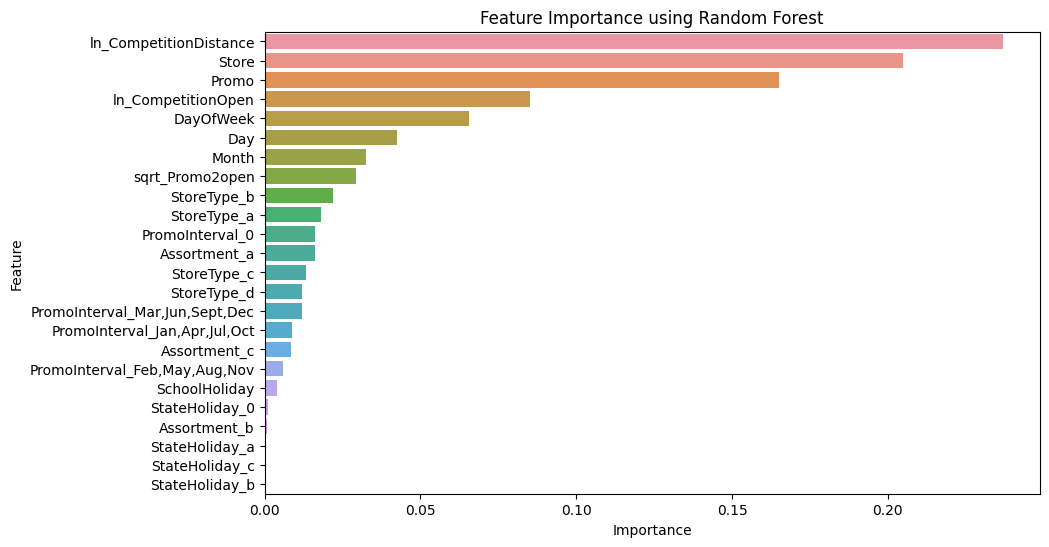

In [ ]:
importance_rf_tuned = pd.DataFrame({'Feature': X.columns,
                              'Importance': rf_tuned.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_rf_tuned, x ='Importance', y ='Feature')
plt.title('Feature Importance using Random Forest with Hyperparameter tuning')
plt.rcParams['figure.figsize'] = (10, 6)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

XG Boost

In [24]:
# ML Model - 3 Implementation
xgb_model = XGBRegressor(max_depth = 20, n_jobs = -1, n_estimators = 100, random_state = 27)

# Fit the Algorithm
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)
y_pred_train_xgb = xgb_model.predict(X_train)

In [27]:
metrics(y_pred_train_xgb, y_pred_xgb, 'XG Boost')

The metrics for model prediction using XG Boost are:

R_squared =  0.9285872601941807

R_squared for training data set =  0.9997252569665757

Adjusted R_squared =  0.9285771093098957

MSE =  21.357061126388647

RMSE =  4.621370048631536

RMSE for training data set =  0.28620508888549256

RMSPE =  6.281645620655358


Text(0.5, 1.0, 'Feature Importance using XG Boost')

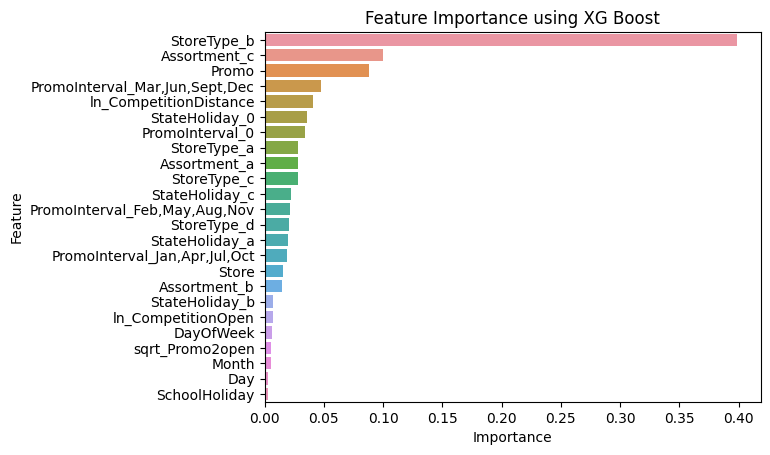

In [28]:
importance_xgb = pd.DataFrame({'Feature': X.columns,
                              'Importance': xgb_model.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [22]:
# ML Model - 3 Implementation with hyperparameter optimization
xgb_tuned = XGBRegressor()
params = {'n_estimators':[200,300], 'max_depth':[15,20], 'learning_rate':[0.2], 'subsample': [0.6], 'colsample_bytree':[0.7]}
xgb_tuned = RandomizedSearchCV(xgb_tuned, param_distributions = params, n_jobs = None, n_iter = 3,
                                random_state = 27, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the Algorithm to train dataset
xgb_tuned.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=3,
                   param_distributions={'colsample_bytree': [0.7],
                                        'learning_rate': [0.2],
                                        'max_depth': [15, 20],
                                        'n_estimators': [200, 300],
                                        'subsample': [0.6]},
                   random_state=27, scoring='neg_mean_squared_error')

In [23]:
print("The best fit parameters are found out to be :" , xgb_tuned.best_params_)
print("\nUsing ",xgb_tuned.best_params_, ", the negative mean squared error is: ", xgb_tuned.best_score_)

# Predict on the model
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_train_xgb_tuned = xgb_tuned.predict(X_train)

The best fit parameters are found out to be : {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.7}

Using  {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.7} , the negative mean squared error is:  -17.39435683110599


In [24]:
metrics(y_pred_train_xgb_tuned, y_pred_xgb_tuned, 'XG Boost with hyperparameter tuning')

The metrics for model prediction using XG Boost with hyperparameter tuning are:

R_squared =  0.9490576907586437

R_squared for training data set =  0.9889950916469681

Adjusted R_squared =  0.9490504496208897

MSE =  15.235068915509999

RMSE =  3.903212640314386

RMSE for training data set =  1.8113702145342974

RMSPE =  5.47393603732694


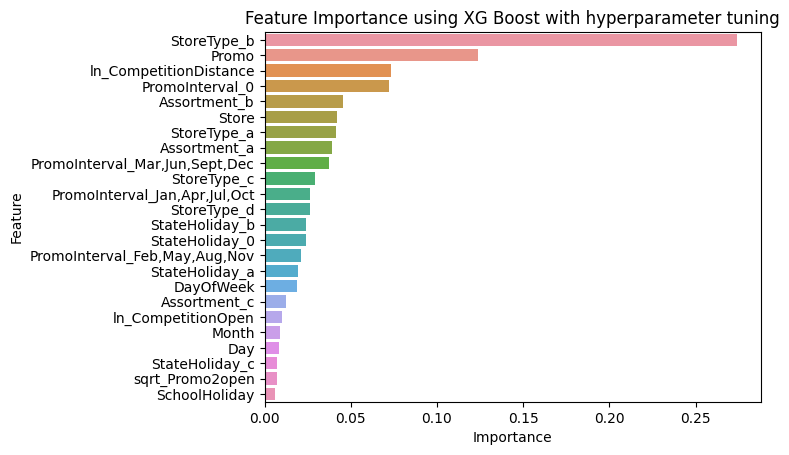

In [25]:
importance_xgb_tuned = pd.DataFrame({'Feature': X.columns,
                              'Importance': xgb_tuned.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb_tuned, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost with hyperparameter tuning')
plt.rcParams['figure.figsize'] = (10, 6)

In [26]:
importance_xgb_tuned

,Feature,Importance
11,StoreType_b,0.273971
2,Promo,0.123577
21,ln_CompetitionDistance,0.073370
17,PromoInterval_0,0.072151
15,Assortment_b,0.045613
0,Store,0.042157
10,StoreType_a,0.041711
14,Assortment_a,0.039404
20,"PromoInterval_Mar,Jun,Sept,Dec",0.037430
12,StoreType_c,0.029286


In [27]:
# ML Model - 3 Implementation with hyperparameter optimization
xgb_tuned1 = XGBRegressor()
params = {'n_estimators':[200,300], 'max_depth':[15,20], 'learning_rate':[0.2], 'subsample': [0.6], 'colsample_bytree':[0.8]}
xgb_tuned1 = RandomizedSearchCV(xgb_tuned1, param_distributions = params, n_jobs = None, n_iter = 4,
                                random_state = 27, scoring = 'neg_mean_squared_error', cv = 3)

# Fit the Algorithm to train dataset
xgb_tuned1.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=4,
                   param_distributions={'colsample_bytree': [0.8],
                                        'learning_rate': [0.2],
                                        'max_depth': [15, 20],
                                        'n_estimators': [200, 300],
                                        'subsample': [0.6]},
                   random_state=27, scoring='neg_mean_squared_error')

In [28]:
print("The best fit parameters are found out to be :" , xgb_tuned1.best_params_)
print("\nUsing ",xgb_tuned1.best_params_, ", the negative mean squared error is: ", xgb_tuned1.best_score_)

# Predict on the model
y_pred_xgb_tuned1 = xgb_tuned1.predict(X_test)
y_pred_train_xgb_tuned1 = xgb_tuned1.predict(X_train)

The best fit parameters are found out to be : {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

Using  {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.8} , the negative mean squared error is:  -17.949020528796577


In [29]:
metrics(y_pred_train_xgb_tuned1, y_pred_xgb_tuned1, 'XG Boost with hyperparameter tuning_1')

The metrics for model prediction using XG Boost with hyperparameter tuning_1 are:

R_squared =  0.9475092818726588

R_squared for training data set =  0.9904056078487818

Adjusted R_squared =  0.94750182063805

MSE =  15.698144037911732

RMSE =  3.962088343022115

RMSE for training data set =  1.691308142497265

RMSPE =  5.534537625345724


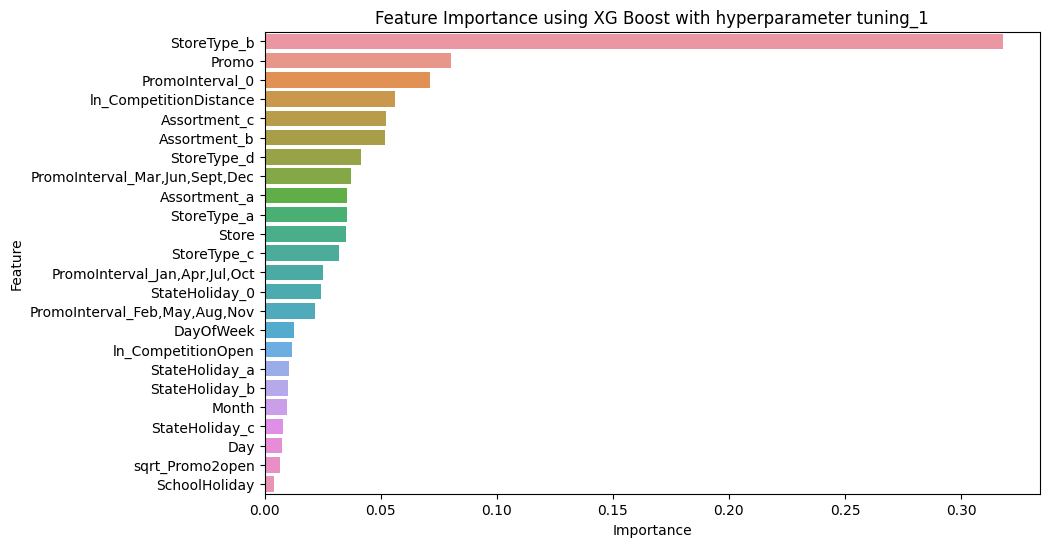

In [30]:
importance_xgb_tuned1 = pd.DataFrame({'Feature': X.columns,
                              'Importance': xgb_tuned1.best_estimator_.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb_tuned1, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost with hyperparameter tuning_1')
plt.rcParams['figure.figsize'] = (10, 6)

In [31]:
importance_xgb_tuned1

,Feature,Importance
11,StoreType_b,0.317891
2,Promo,0.080139
17,PromoInterval_0,0.071470
21,ln_CompetitionDistance,0.056204
16,Assortment_c,0.052247
15,Assortment_b,0.052095
13,StoreType_d,0.041753
20,"PromoInterval_Mar,Jun,Sept,Dec",0.037433
14,Assortment_a,0.035554
10,StoreType_a,0.035502


In [ ]:
xgb_tuned2 = XGBRegressor(n_jobs = -1, random_state = 27, n_estimators = 1000, learning_rate = 0.2,
                     max_depth = 15, subsample = 0.8, colsample_bytree = 0.7)

xgb_tuned2.fit(X_train,y_train)

y_pred_xgb2 = xgb_tuned2.predict(X_test)
y_pred_train_xgb2 = xgb_tuned2.predict(X_train)

In [25]:
metrics(y_pred_train_xgb2, y_pred_xgb2, 'XG Boost with hyperparameter tuning_2')

The metrics for model prediction using XG Boost with hyperparameter tuning_2 are:

R_squared =  0.9465891907488039

R_squared for training data set =  0.9999235181901336

Adjusted R_squared =  0.946581598728868

MSE =  15.973311219950235

RMSE =  3.996662510138958

RMSE for training data set =  0.15100561112587219

RMSPE =  5.594508531480663


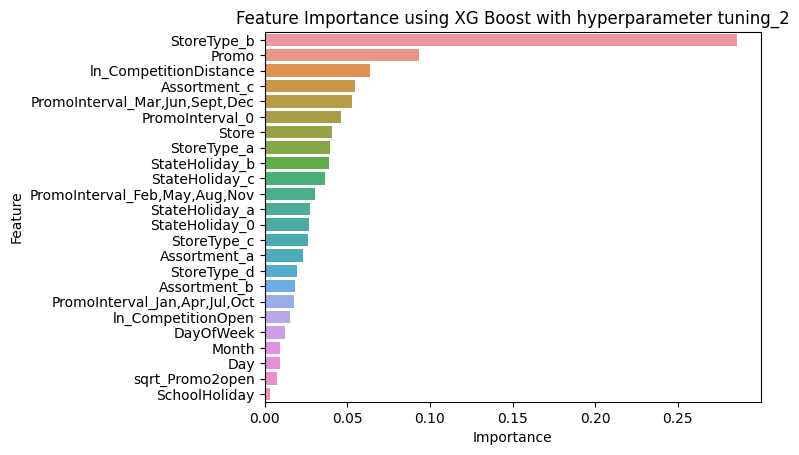

In [26]:
importance_xgb2 = pd.DataFrame({'Feature': X.columns,
                              'Importance': xgb_tuned2.feature_importances_}
                             ).sort_values('Importance', ascending = False)

sns.barplot(data = importance_xgb2, x ='Importance', y ='Feature')

plt.title('Feature Importance using XG Boost with hyperparameter tuning_2')
plt.rcParams['figure.figsize'] = (10, 6)

In [27]:
importance_xgb2

,Feature,Importance
11,StoreType_b,0.285705
2,Promo,0.093433
21,ln_CompetitionDistance,0.063956
16,Assortment_c,0.054563
20,"PromoInterval_Mar,Jun,Sept,Dec",0.052786
17,PromoInterval_0,0.046042
0,Store,0.040693
10,StoreType_a,0.039465
8,StateHoliday_b,0.038876
9,StateHoliday_c,0.036750


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# **Conclusion**

Write the conclusion here.